# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re


# Load Data

In [2]:
df = pd.read_csv(r"..\data\new data\balanced_reviews.csv", encoding='latin-1')

print("balanced_reviews dataset shape:", df.shape)

balanced_reviews dataset shape: (12500, 3)


# View Data

In [3]:
print("\nbalanced_reviews dataset:")

df.info()
df.describe()


balanced_reviews dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        12500 non-null  int64 
 1   Review        12500 non-null  object
 2   ReviewLength  12500 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 293.1+ KB


,Rating,ReviewLength
count,12500.00000,12500.000000
mean,3.00000,593.553040
std,1.41427,703.221171
min,1.00000,4.000000
25%,2.00000,167.000000
50%,3.00000,325.000000
75%,4.00000,720.000000
max,5.00000,8114.000000


In [4]:
df.head()


,Rating,Review,ReviewLength
0,1,I didnt really like ths book because their was...,104
1,1,I have a Kindle DX and the text to speech keep...,126
2,1,"I don't like the character Natalie, i.e. the h...",1582
3,1,This book was one of the most poorly edited bo...,216
4,1,I simply could not find a story in what felt l...,164


In [5]:
df.tail()

,Rating,Review,ReviewLength
12495,5,Another hard to put down book by this author! ...,605
12496,5,The story is well written. The scenario is a g...,120
12497,5,This series gripped me from the first and I co...,1457
12498,5,"Author C. Callinsky's new novel ""Rear View Mir...",1141
12499,5,"Matt Cahill, The Dead Man, had come 3,000 mile...",814


# Selecting Columns

In [6]:
# Keep only relevant columns
df = df[['Rating', 'Review']]

print("Final dataset columns:", df.columns.tolist())
print("Final dataset shape:", df.shape)


Final dataset columns: ['Rating', 'Review']
Final dataset shape: (12500, 2)


# Natural Language Processing (NLP)

# Lowercase All Text

In [7]:
# Convert all review text to lowercase
df['Review'] = df['Review'].str.lower()

df.head()


,Rating,Review
0,1,i didnt really like ths book because their was...
1,1,i have a kindle dx and the text to speech keep...
2,1,"i don't like the character natalie, i.e. the h..."
3,1,this book was one of the most poorly edited bo...
4,1,i simply could not find a story in what felt l...


# Remove URL

In [8]:
# Remove URLs from the review text
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.IGNORECASE))

df.head()


,Rating,Review
0,1,i didnt really like ths book because their was...
1,1,i have a kindle dx and the text to speech keep...
2,1,"i don't like the character natalie, i.e. the h..."
3,1,this book was one of the most poorly edited bo...
4,1,i simply could not find a story in what felt l...


# Remove HTML tags

In [9]:
# Remove HTML tags from review text
df['Review'] = df['Review'].apply(lambda x: re.sub(r'<.*?>', '', x))

df.head()


,Rating,Review
0,1,i didnt really like ths book because their was...
1,1,i have a kindle dx and the text to speech keep...
2,1,"i don't like the character natalie, i.e. the h..."
3,1,this book was one of the most poorly edited bo...
4,1,i simply could not find a story in what felt l...


# Remove emojis, punctuation and special characters

In [10]:
# Remove emojis, punctuation, and special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Remove extra whitespaces
df['Review'] = df['Review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


df.head()


,Rating,Review
0,1,i didnt really like ths book because their was...
1,1,i have a kindle dx and the text to speech keep...
2,1,i dont like the character natalie ie the heroi...
3,1,this book was one of the most poorly edited bo...
4,1,i simply could not find a story in what felt l...


# Showing stopwords

In [11]:
import spacy

# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')

#  get stopwords list
stopwords = nlp.Defaults.stop_words
print(f"Number of stopwords: {len(stopwords)}")
print("Sample stopwords:", list(stopwords)[:20])

#  count stopwords in each review
df['Stopword_Count'] = df['Review'].apply(lambda x: sum(1 for token in x.split() if token in stopwords))


df[['Review', 'Stopword_Count']].head()


Number of stopwords: 326
Sample stopwords: ['while', 'every', 'she', 'almost', 'something', 'become', 'he', 'elsewhere', 'just', 'has', 'will', 'thus', 'all', 'did', 'sometimes', 'least', 'some', 'becoming', 'doing', 'me']


,Review,Stopword_Count
0,i didnt really like ths book because their was...,10
1,i have a kindle dx and the text to speech keep...,13
2,i dont like the character natalie ie the heroi...,172
3,this book was one of the most poorly edited bo...,27
4,i simply could not find a story in what felt l...,17


# Total stopwords in all reviews:

In [12]:
# Total stopwords in the entire dataset
total_stopwords = df['Stopword_Count'].sum()
print("Total stopwords in all reviews:", total_stopwords)


Total stopwords in all reviews: 761045


# Remove stopwords

In [13]:
# Function to remove stopwords
def remove_stopwords(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if token.text not in nlp.Defaults.stop_words])

# Apply to the Review column
df['Review'] = df['Review'].apply(remove_stopwords)

df.head()


,Rating,Review,Stopword_Count
0,1,nt like ths book swrwrds othrws ws ok peace,10
1,1,kindle dx text speech keeps stopping message t...,13
2,1,nt like character natalie ie heroine story men...,172
3,1,book poorly edited books read great continuity...,27
4,1,simply find story felt like streamofconsciousn...,17


# Apply Lemmatization

In [14]:

# Function for lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply lemmatization to the Review column
df['Review'] = df['Review'].apply(lemmatize_text)

df.head()


,Rating,Review,Stopword_Count
0,1,not like ths book swrwrd othrws ws ok peace,10
1,1,kindle dx text speech keep stop message text s...,13
2,1,not like character natalie ie heroine story me...,172
3,1,book poorly edit book read great continuity mi...,27
4,1,simply find story feel like streamofconsciousn...,17


# Filter out reviews with: Fewer than minimum words and Excessively long text

In [15]:
# Define thresholds
min_words = 3      # Minimum words per review
max_words = 300     # Maximum words per review

# Count words in each review
df['Word_Count'] = df['Review'].apply(lambda x: len(x.split()))

# Filter reviews
df = df[(df['Word_Count'] >= min_words) & (df['Word_Count'] <= max_words)].reset_index(drop=True)

print("Dataset shape after filtering:", df.shape)
df[['Review', 'Word_Count']].head()


Dataset shape after filtering: (12406, 4)


,Review,Word_Count
0,not like ths book swrwrd othrws ws ok peace,9
1,kindle dx text speech keep stop message text s...,11
2,not like character natalie ie heroine story me...,123
3,book poorly edit book read great continuity mi...,14
4,simply find story feel like streamofconsciousn...,13


# Word count

In [16]:
# Add a column with word count for each review
df['Word_Count'] = df['Review'].apply(lambda x: len(x.split()))


df[['Review', 'Word_Count']].head()




,Review,Word_Count
0,not like ths book swrwrd othrws ws ok peace,9
1,kindle dx text speech keep stop message text s...,11
2,not like character natalie ie heroine story me...,123
3,book poorly edit book read great continuity mi...,14
4,simply find story feel like streamofconsciousn...,13


In [17]:
# statistics on word count
print("Word Count Statistics:")
df['Word_Count'].describe()

Word Count Statistics:


count    12406.000000
mean        44.623086
std         48.093136
min          3.000000
25%         13.000000
50%         25.000000
75%         56.000000
max        299.000000
Name: Word_Count, dtype: float64

# Data Visualization

# Bar plot: Review count per rating

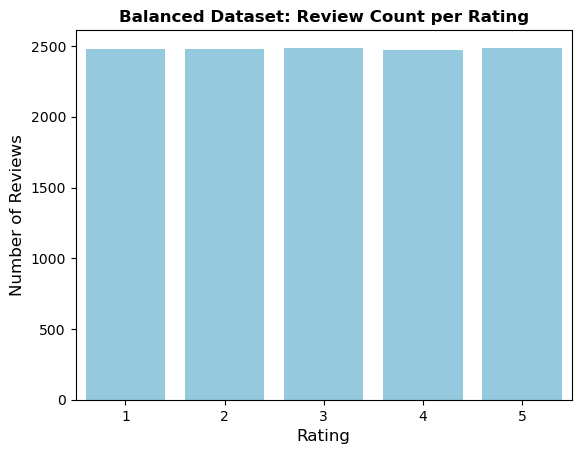

In [18]:
sns.countplot(x='Rating', data=df, color='skyblue')
plt.title('Balanced Dataset: Review Count per Rating', fontsize=12, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Rating Distribution (Pie Chart)

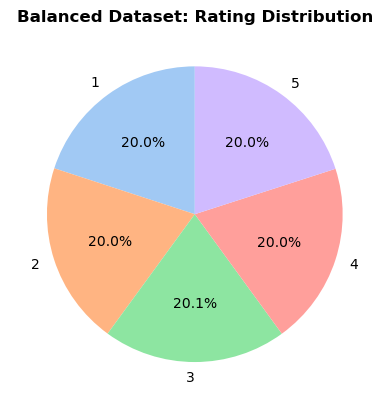

In [19]:
# Count of reviews per rating
rating_counts = df['Rating'].value_counts().sort_index()

# Labels and values for pie chart
categories = rating_counts.index
values = rating_counts.values

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Balanced Dataset: Rating Distribution", fontsize=12, weight='bold')
plt.show()


# Histogram for Word Count

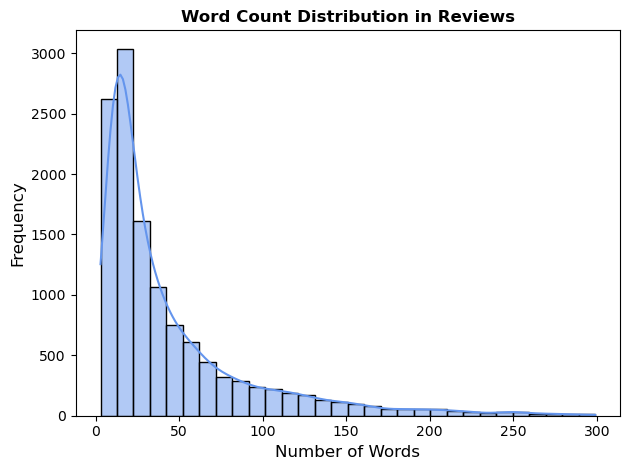

In [20]:
sns.histplot(df['Word_Count'], bins=30, kde=True, color='cornflowerblue')
plt.title('Word Count Distribution in Reviews', fontsize=12, weight='bold')
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)



plt.tight_layout()
plt.show()

# Box Plot: Word count by Rating

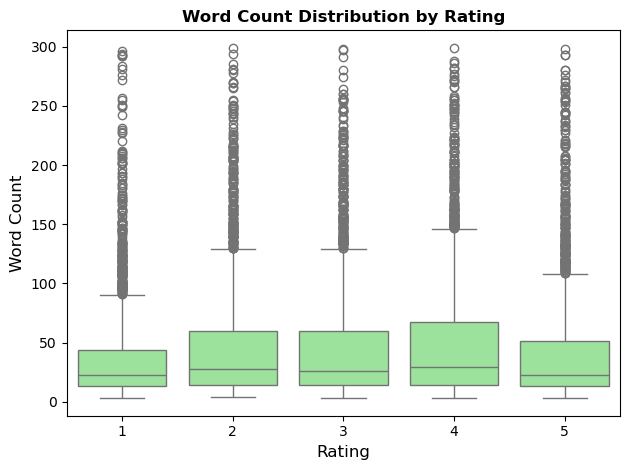

In [21]:

sns.boxplot(x='Rating', y='Word_Count', data=df, color='lightgreen')
plt.title('Word Count Distribution by Rating', fontsize=12, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



# full sample reviews per rating

In [22]:
# Display 5 sample reviews per rating
for rating, group in df.groupby('Rating'):
    print(f"\n--- Rating: {rating} ---\n")
    sample_reviews = group['Review'].sample(
        n=min(5, len(group)),
        random_state=42
    )
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review}\n")



--- Rating: 1 ---

1. free read know not bother time waste reading

2. thing get end story sheer cussedness storyline flat absolutely character development dialog cheesy porn find increasingly disgusted female lead whine way find sympathetic protagonist find caring story explain bring main character point book suspend belief well not buy time

3. story alex alley taylor like cup tea threesome happy story

4. write terrible grammer terrible plot ridiculous bad stereotype thing

5. writer learn difference betweenthere theyreyour yourewere wereand standard grammar book find book actually painful read attempt humor funny time hard translate mush real english take away pure joy type story


--- Rating: 2 ---

1. idea story good fact vampires not feed leave mark neck confuse give book 2 star possibility need rework need lot editing begin pay attention misspelling space period part not line happen etc detract away story vampire not end book big let wellthe love story force way fast way unrea

# Keep only Review and Rating columns

In [23]:

df = df[['Review', 'Rating']]

# Check final columns and shape
print("Final dataset columns:", df.columns.tolist())
print("Final dataset shape:", df.shape)
df.head()


Final dataset columns: ['Review', 'Rating']
Final dataset shape: (12406, 2)


,Review,Rating
0,not like ths book swrwrd othrws ws ok peace,1
1,kindle dx text speech keep stop message text s...,1
2,not like character natalie ie heroine story me...,1
3,book poorly edit book read great continuity mi...,1
4,simply find story feel like streamofconsciousn...,1


# Shuffle the dataset

In [24]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


,Review,Rating
0,character great disappointing little story fac...,1
1,good reading quality mixed nephew sophisticate...,3
2,good bdsm love story read tough read mm love f...,5
3,read lot book genre book baffle understand lit...,2
4,bible easily understand purchase bible young l...,5


# Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

# Features and target
X = df['Review']
y = df['Rating']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)


print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (10545,)
Testing set shape: (1861,)


In [26]:
# Save train and test sets to CSV files
train_data = pd.DataFrame({'Review': X_train, 'Rating': y_train})
test_data = pd.DataFrame({'Review': X_test, 'Rating': y_test})

train_csv_path = r"..\data\new data\balanced_train.csv"
test_csv_path = r"..\data\new data\balanced_test.csv"

train_data.to_csv(train_csv_path, index=False, encoding='utf-8')
test_data.to_csv(test_csv_path, index=False, encoding='utf-8')

print(f"Training set saved at: {train_csv_path}")
print(f"Testing set saved at: {test_csv_path}")


Training set saved at: ..\data\new data\balanced_train.csv
Testing set saved at: ..\data\new data\balanced_test.csv


In [27]:

# Convert lists to pandas Series
X_train = pd.Series(X_train)
X_test = pd.Series(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Now you can check shape and value counts
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train shape: (10545,)
X_test shape: (1861,)
y_train distribution:
 Rating
3    2115
5    2112
2    2108
1    2106
4    2104
Name: count, dtype: int64
y_test distribution:
 Rating
3    373
5    373
2    372
1    372
4    371
Name: count, dtype: int64


# Text Feature Extraction using TF-IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    max_features=15000,   # expand features
    ngram_range=(1, 3),   # unigrams + bigrams + trigrams
    min_df=2,
    max_df=0.95
)



# Fit TF-IDF on training data and transform
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = vectorizer.transform(X_test)

print("Training TF-IDF shape:", X_train_tfidf.shape)
print("Testing TF-IDF shape:", X_test_tfidf.shape)




Training TF-IDF shape: (10545, 15000)
Testing TF-IDF shape: (1861, 15000)


In [29]:
from sklearn.utils.class_weight import compute_class_weight


classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))


In [30]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(10545, 15000)
(1861, 15000)


In [31]:

# -----------------------------
#  Feature Selection (chi²)

from sklearn.feature_selection import SelectKBest, chi2

k = 35000  # Keep top 15,000 features
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = selector.transform(X_test_tfidf)

print("Training shape after feature selection:", X_train_selected.shape)
print("Testing shape after feature selection:", X_test_selected.shape)

Training shape after feature selection: (10545, 15000)
Testing shape after feature selection: (1861, 15000)


C:\Users\sreel\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=35000 is greater than n_features=15000. All the features will be returned.
  warnings.warn(


# Convert TF-IDF Matrices to DataFrames

In [32]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF matrices to DataFrames
X_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)
X_test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=feature_names)

print("\nTrain TF-IDF DataFrame shape:", X_train_df.shape)
print("Test TF-IDF DataFrame shape:", X_test_df.shape)
X_train_df.head()




Train TF-IDF DataFrame shape: (10545, 15000)
Test TF-IDF DataFrame shape: (1861, 15000)


,099,10,10 book,10 minute,10 page,10 year,10 year old,100,100 page,100 year,...,zip,zoe,zombie,zombie apocalypse,zombie book,zombie story,zombie tale,zone,zorn,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_train_df.tail()

,099,10,10 book,10 minute,10 page,10 year,10 year old,100,100 page,100 year,...,zip,zoe,zombie,zombie apocalypse,zombie book,zombie story,zombie tale,zone,zorn,zu
10540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
import os
import joblib

model_dir = r"..\models"
os.makedirs(model_dir, exist_ok=True)

# Save word-level TF-IDF vectorizer
word_vectorizer_path = os.path.join(model_dir, "tfidf_balanced.pkl")
joblib.dump(vectorizer, word_vectorizer_path)

print(f"TF-IDF Vectorizer saved at: {word_vectorizer_path}")



TF-IDF Vectorizer saved at: ..\models\tfidf_balanced.pkl


# Training and Evaluation of Machine Learning Models

C:\Users\sreel\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.4868

Classification Report:
              precision    recall  f1-score   support

           1     0.5690    0.6317    0.5987       372
           2     0.4282    0.3925    0.4095       372
           3     0.3911    0.3753    0.3830       373
           4     0.4190    0.4043    0.4115       371
           5     0.6010    0.6300    0.6152       373

    accuracy                         0.4868      1861
   macro avg     0.4816    0.4868    0.4836      1861
weighted avg     0.4817    0.4868    0.4837      1861



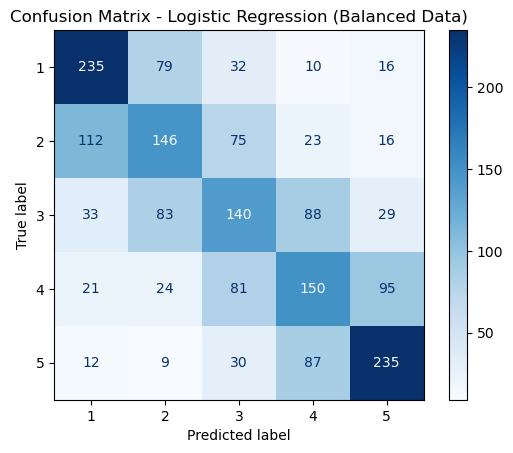

In [35]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
lr_model = LogisticRegression(
    max_iter=8000,
    solver='saga',              # good for large sparse data
    multi_class='multinomial',
    class_weight=class_weights_dict,
    random_state=42
)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression (Balanced Data)")
plt.show()

# Saving Trained Machine Learning Models

In [36]:
import joblib
import os

model_dir = r"..\models"
os.makedirs(model_dir, exist_ok=True)  

model_path = os.path.join(model_dir, 'Model_Balanced.pkl')

# Save the trained Logistic Regression model
joblib.dump(lr_model, model_path)
print(f"Model saved successfully at {model_path}")


Model saved successfully at ..\models\Model_Balanced.pkl
